# Le but de ce script est avoir quelques idées de base pour le traitement d'images en utilisant  les outils de OpenCV

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('2.jpg') #image  png ou autre type

# afficher une image en mode RGB (rouge, vert, bleu)

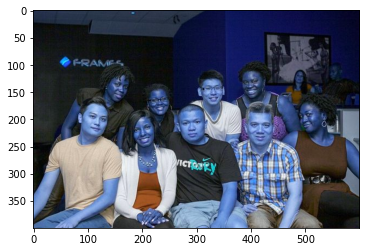

In [6]:
plt.imshow(image)
plt.show() 

# Inverser les couleurs

# a fonction split()->renvoie un vecteur numpy de 2 dimensions pour chaque canal. Merge() --> réassembler dans le bon ordre  r, g, b

In [7]:
b, g, r = cv2.split(image)
image = cv2.merge([r, g, b])

# afficher l'image

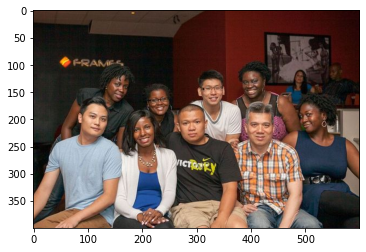

In [8]:
plt.imshow(image)
plt.show()

# enregistrer l'image .png ou autre format

In [9]:
cv2.imwrite('C:/Users/sebas\Documents/COURS EN LIGNE/my/Histogramme_d_image.png', image)

True

# Détection des bords

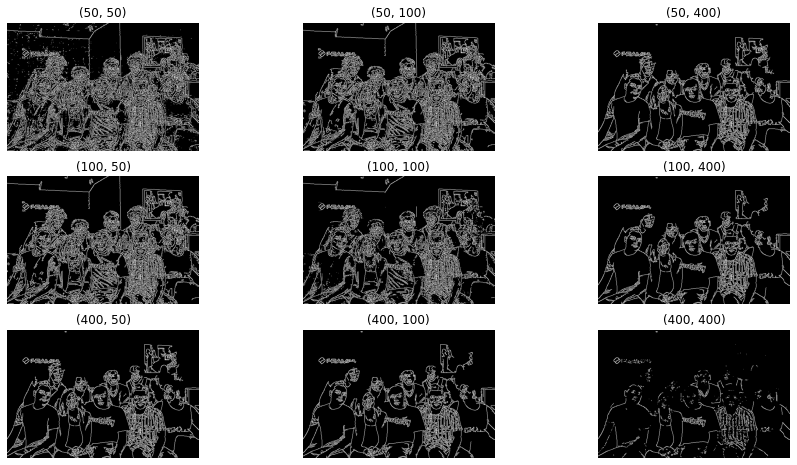

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
# Liste des valeurs
Val1 = [50, 100, 400]
Val2 = [50, 100, 400]
for i, val1 in enumerate(Val1):
    for j, val2 in enumerate(Val2):
        edge_image = cv2.Canny(image, val1 , val2)
        axs[i][j].imshow(edge_image, cmap = 'Greys_r')
        axs[i][j].set_title((val1,val2))
        axs[i][j].set_axis_off()

# Segmentation

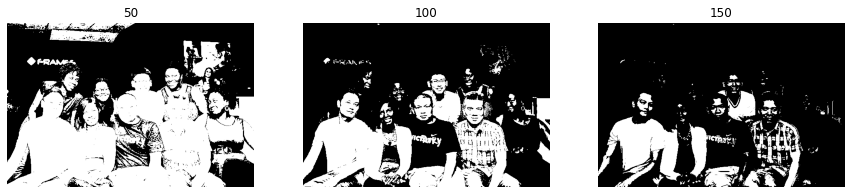

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,8))
# Transformer l’image en nuance de gris
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Les seuils de la segmentation
seuils = [50, 100, 150]
for i, seuil in enumerate(seuils):
    val , seg_image = cv2.threshold(grey_image, seuil, 255, cv2.THRESH_BINARY)
    axs[i].imshow(seg_image, cmap = 'Greys_r')
    axs[i].set_title(seuil)
    axs[i].set_axis_off()



# Détection d’objets : 

# classicateur de faces

In [16]:
haar_file = 'haarcascade_frontalface_default.xml' #classicatueyr de faces
#haar_file = 'haarcascade_eye_tree_eyeglasses.xml'#classicateur de yes
face_cascade = cv2.CascadeClassifier( cv2.data.haarcascades + haar_file )

In [17]:
# Image en nuance de gris
grey_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(grey_image)
print("Nombre de visages détecté dans l’image: {0}".format(len(faces)))

Nombre de visages détecté dans l’image: 8


# Afficher les paramètres du premier visage détecté. 

# Le script suivant renvoie la liste suivante [236, 278, 615, 615]

In [18]:
position_list = faces.tolist()
print( position_list[0] )

[307, 124, 49, 49]


In [19]:
#position_list

# dessiner des rectangles autour des visages détectés

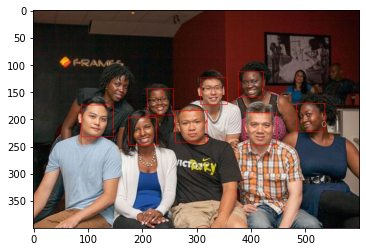

In [21]:
for (x, y, w, h) in position_list:
    cv2.rectangle(image, (x, y), (x + w, y + h), color = 255)
    plt.imshow(image)
    #plt.show() #decommenter pour afficher tous les images de 1 jusqu'à N face detecté

# Enregistrer l'image .png

In [22]:
cv2.imwrite('C:/Users/sebas\Documents/COURS EN LIGNE/my/face_with_rectangle.jpg', image)

True

# Détection d’objets : classicateur de yeux

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('4.jpg')
# informations
print( 'classe :', type(image) )
print( 'type :', image.dtype )
print( 'taille :', image.shape )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (666, 500, 3)


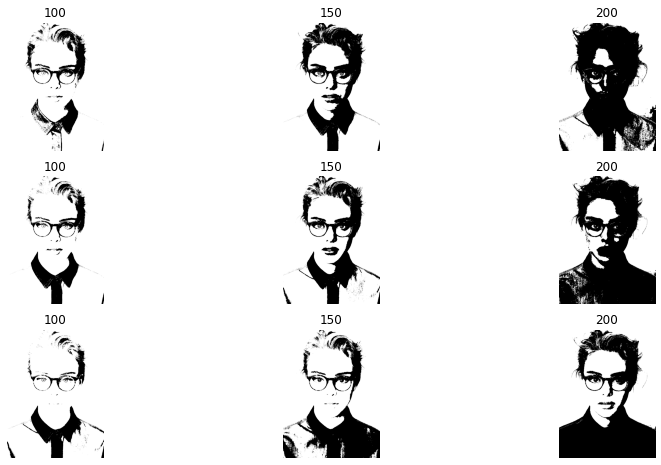

In [112]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(14,8))
# Une image pour chaque canal
list_RGB = cv2.split(image)
# Les seuils de la segmentation
seuils = [100, 150, 200]
for i, seuil in enumerate(seuils):
    for j, img in enumerate(list_RGB):
        val , seg_image = cv2.threshold(img, seuil, 255, cv2.THRESH_BINARY)
        axs[j][i].imshow(seg_image, cmap = 'Greys_r')
        axs[j][i].set_title( seuil )
        axs[j][i].set_axis_off()

# classicateur de yeus

In [24]:
import cv2
# Classificateur des yeux


#haar_file = 'haarcascade_eye.xml'

haar_file = 'haarcascade_eye_tree_eyeglasses.xml'
eye_cascade = cv2.CascadeClassifier( cv2.data.haarcascades + haar_file )
# image en nuance de gris
img_gray = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY)
eyes = eye_cascade.detectMultiScale( img_gray )
print("Nombre de yeux détecté dans l’image: {0}".format(len(eyes)))


Nombre de yeux détecté dans l’image: 2


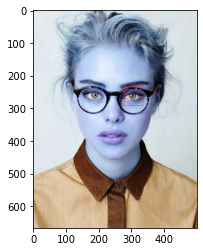

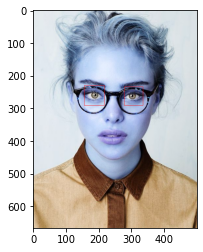

In [25]:
position_list = eyes.tolist()
for (x, y, w, h) in position_list:
    cv2.rectangle(image, (x, y), (x + w, y + h), color = 255)
    plt.imshow(image)
    plt.show()